In [29]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [34]:
def randomquicksort(A):
    return randomquicksorthelper(A,0,len(A)-1)  #time to be added
    
def randomquicksorthelper(A,first,last):
    if first<last:
        c = splitpoint,compspart = randompartition(A,first,last)
    
        a = randomquicksorthelper(A,first,splitpoint-1)
        b = randomquicksorthelper(A,splitpoint+1,last)
        return a + b + c[1]
    else:
        return 0
    
def randompartition(A,first,last):
    partition_index = random.randint(first,last)
    #swap
    A[partition_index],A[first] = A[first],A[partition_index]
    
    pivot = A[first]
    compspart = 0
    l = first+1
    r = last
    
    while(True):
        while l <= r and A[l] <= pivot:
            l+=1;compspart +=1
        while A[r] >= pivot and r >= l:
            r-=1;compspart +=1
        compspart +=2
        
        if(r<l):break
        A[l],A[r] = A[r],A[l]
    
    A[first],A[r] = A[r],A[first]
    return r,compspart

def randomquicksorttimedistrib(n,runs): 
    # Create an array of 1 .. n  
    x = list(reversed(range(n)))
    
    # Run quicksort for each permutation
    tlist = [ randomquicksort(x) for i in range(runs) ]
    sums = sum(tlist)
        
    mean = statistics.mean(tlist)
    stdev = statistics.stdev(tlist)
    min_val = min(tlist)
    max_val = max(tlist)
    best_case = n*np.log2(n)
    worst_case = n*n
    avg_case = 1.38*n*np.log2(n)
    
    #show Info
    plt.hist(tlist, bins='auto')
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Probability")
    plt.show()
    
    print("n",n)
    print("Runs",runs)
    print("Mean",mean)
    print("Stdev",stdev)
    print("Min",min_val)
    print("Max",max_val)
    print()
    print("Teorical Values")
    print("Best Case",best_case)
    print("Worst Case",worst_case)
    print("Avg Case",avg_case)
    print()
    print('Difference:')
    print(abs(avg_case - mean))
    print()
    print('Probability of 1.5 times Theoretical')
    u = round(1.5*avg_case)
    print('1.5 times theoretical: ', u)
    dist = scipy.stats.norm(mean, stdev)
    print('probabilidad', dist.pdf(u))
    print('probabilidad acumulada', dist.cdf(u))
    

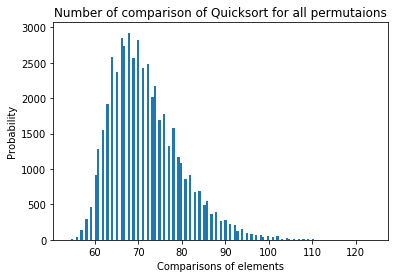

n 16
Runs 50000
Mean 71.68814
Stdev 8.046100803194221
Min 54
Max 124

Teorical Values
Best Case 64.0
Worst Case 256
Avg Case 88.32

Difference:
16.63186

Probability of 1.5 times Theoretical
1.5 times theoretical:  132.0
probabilidad 3.12255552121e-14
probabilidad acumulada 1.0


In [36]:
times = 50000
n = 16
randomquicksorttimedistrib(n,times)